# Calcul du descripteur de Moravec

In [23]:
import cv2 
import numpy as np 
from scipy import ndimage
from matplotlib import pyplot as plt

In [14]:
image = cv2.imread("chess.jpg",0)
CorrectnessMap=np.zeros(image.shape)
deplacements=[(1, 0), (1, 1), (0, 1), (-1, 1),(-1,0),(-1,-1),(0,-1)]

def moravec(image, seuil):
    points = []
    for x in range(2,image.shape[0]-2):
        for y in range(2,image.shape[1]-2):            
            mini = 4080 # max is 255*255*8 = 4080
            for dep in deplacements:
                var = np.sum((image[x-1+dep[0]:x+1+ dep[0],y-1+ dep[1]:y+1+ dep[1]]-image[x-1:x+1,y-1:y+1])**2)
                if var < mini :
                    mini = var
                    #print(mini)
            if mini > seuil:
                points.append((x, y))
    return points    
p=[]
p=moravec(image,1)

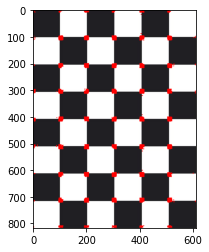

In [15]:
#l'affichage des points 
imageOut = cv2.imread("chess.jpg")
for point in p:
       for x in range(-1, 2):
        for y in range(-1, 2):
            imageOut[point[0]+x, point[1]+y,0:3]= [255,0,0]
plt.imshow(imageOut,cmap='gray')

In [24]:
# Hessian algorithm

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import sys


img=cv2.imread('chess.jpg')
im=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
w,h =img.shape[0],img.shape[1]
'''
dx = np.zeros(img.shape,dtype=np.uint8)
for x in range(w):
    for y in range(h-1):
        dx[x][y]=abs(img[x][y+1]-img[x][y-1])

dy = np.zeros(img.shape,dtype=np.uint8)
for y in range(1,h):
    for x in range(1,w-1):
        dy[x][y]=abs(img[x+1][y]-img[x-1][y])
'''

def ourConvolve(image, kernel):
# grab the spatial dimensions of the image, along with
# the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
# add borders of size kernel/2
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
# loop over the input image, "sliding" the kernel across
# each (x, y)-coordinate from left-to-right and top to
# bottom
    for y in np.arange(pad, iH + pad):
       for x in np.arange(pad, iW + pad):
    # perform the actual convolution by taking the
    # element-wise multiplicate between the ROI and
    # the kernel, then summing the matrix
        k = (image[y - pad:y + pad + 1, x - pad:x + pad + 1] * kernel).sum()
    # store the convolved value in the output (x,y)-
    # coordinate of the output image
        output[y - pad, x - pad] = k
    41
    # rescale the output image to be in the range [0, 255]
   # I2b=cv2.equalizeHist(I[:,:,0])
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    # return the output image
    return output

x = np.array((       #dérivée seconde en utilisant sobelX x2 comme resultat on obtien ce filrte x pout Ixx y pour Iyy
[0, 0, 0],
[1, -2, 1],
[0, 0, 0]), dtype="int")

y = np.array((
[0, 1, 0],
[0, -2, 0],
[0, 1, 0]), dtype="int")

xy = np.array((        #sobelX * sobelY produit une matrice 5x5 dont sont equivalent en 3x3 est xy puis yx
[1, -2, 1],
[2, -4, 2],
[1, -2, 1]), dtype="int")

yx = np.array((
[1, 0, -1],
[0, 0, 0],
[-1, 0, 1]), dtype="int")


from skimage.exposure import rescale_intensity
dx = ourConvolve(im, x)
dy = ourConvolve(im, y)

dxy = ourConvolve(im, xy)
dxy = ourConvolve(dxy, yx)

det=np.zeros(img.shape,dtype=np.int)
for x in range(w):
    for y in range(h):
     
        if dx[x][y]*dy[x][y] - (dxy[x][y]**2) > 0 :
            det[x][y] = dx[x][y]*dy[x][y] - (dxy[x][y]**2) 
        else :
            det[x][y] = 0

poi=np.zeros(img.shape,dtype=np.int)
for x in range(w):
    for y in range(h):     
        if dx[x][y]*dy[x][y] - (dxy[x][y]**2) > 200 :
            poi[x][y]=dx[x][y]*dy[x][y] - (dxy[x][y]**2)
            cv2.circle(img,(y,x), 2, (0,255,0), -1)
        else :
            poi[x][y] = 0



cv2.imshow('dx',dx)
cv2.imshow('dy',dy)
cv2.imshow('dxy',dxy)
cv2.imshow('determinant de coins',np.uint8(det))
cv2.imshow('determinant de points d"interet avec sueil',np.uint8(poi))
cv2.imshow('les points clé',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


<ipython-input-24-8baa5726b69a>:86: RuntimeWarning: overflow encountered in ubyte_scalars
  if dx[x][y]*dy[x][y] - (dxy[x][y]**2) > 0 :
<ipython-input-24-8baa5726b69a>:87: RuntimeWarning: overflow encountered in ubyte_scalars
  det[x][y] = dx[x][y]*dy[x][y] - (dxy[x][y]**2)
<ipython-input-24-8baa5726b69a>:94: RuntimeWarning: overflow encountered in ubyte_scalars
  if dx[x][y]*dy[x][y] - (dxy[x][y]**2) > 200 :
<ipython-input-24-8baa5726b69a>:95: RuntimeWarning: overflow encountered in ubyte_scalars
  poi[x][y]=dx[x][y]*dy[x][y] - (dxy[x][y]**2)


In [1]:
# Harris

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from scipy import ndimage as ndi
from scipy import signal as sig
from skimage.feature import corner_peaks

In [2]:
image = cv.imread('chess.jpg')  #l'image à lire
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

In [3]:
#fonction de gradient sur l'axe X et Y (convolution avec masque de sobel)
def gradX(img):  
    sobel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    return sig.convolve2d(img,sobel_x, mode='same')

def gradY(img):
    sobel_y = np.array([[-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]])

    return sig.convolve2d(img,sobel_y, mode='same')

In [4]:
x = gradX(gray)    #gradient sur X

In [5]:
y = gradY(gray)    #gradient sur Y

In [6]:
#pour flouter 
xx = ndi.gaussian_filter(x**2, sigma=1)
xy = ndi.gaussian_filter(y*x, sigma=1)
yy = ndi.gaussian_filter(y**2, sigma=1)

In [7]:
k = 0.05   #constante k
det = xx*yy - xy**2  #déterminant de la matrice 2*2 pour chaque pixel


In [8]:
trace = xx + yy  #trace
    
harris = det - (k * (trace ** 2))  

In [9]:
coins = corner_peaks(harris) #trouver les valeurs max

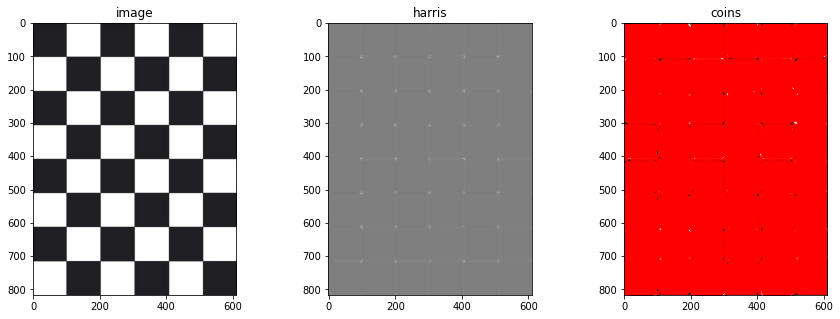

In [10]:
fig, f = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
f[0].set_title("image")
f[0].imshow(image)
f[1].set_title("harris")
f[1].imshow(harris,cmap="gray")
f[2].set_title("coins")
f[2].imshow(image, interpolation='nearest', cmap=plt.cm.gray)
f[2].plot(coins[:, 1], coins[:, 0], '.r', markersize=3)
plt.show()

# Utilisation d'OpenCV pour le calcul de Harris :

img - image en entrée (en niveau de gris et de typefloat32 ) //
blockSize - la taille de la fenetre de voisinage //
ksize - utilisé pour calculer la derivé de Soble //
k - parametre de Harris detector



In [ ]:
import cv2
import numpy as np

filename = 'chess.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

# Utilisation de skimage pour le calcul de Harris :

img - image en entrée (en niveau de gris et de typefloat32 ) // blockSize - la taille de la fenetre de voisinage // ksize - utilisé pour calculer la derivé de Soble // k - parametre de Harris detector


In [16]:
from skimage.feature import corner_harris
image = cv.imread('chess.jpg')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
im=corner_harris(gray)

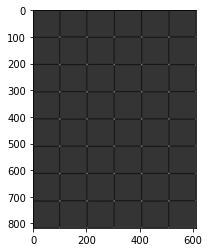

In [20]:
plt.imshow(im, cmap=plt.cm.gray)

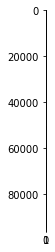

In [22]:
coins = corner_peaks(im, min_distance=1)
plt.imshow(coins, cmap=plt.cm.gray)